# Diseño de software para cómputo científico

----

## Unidad 3: Continuous Integration (CI)

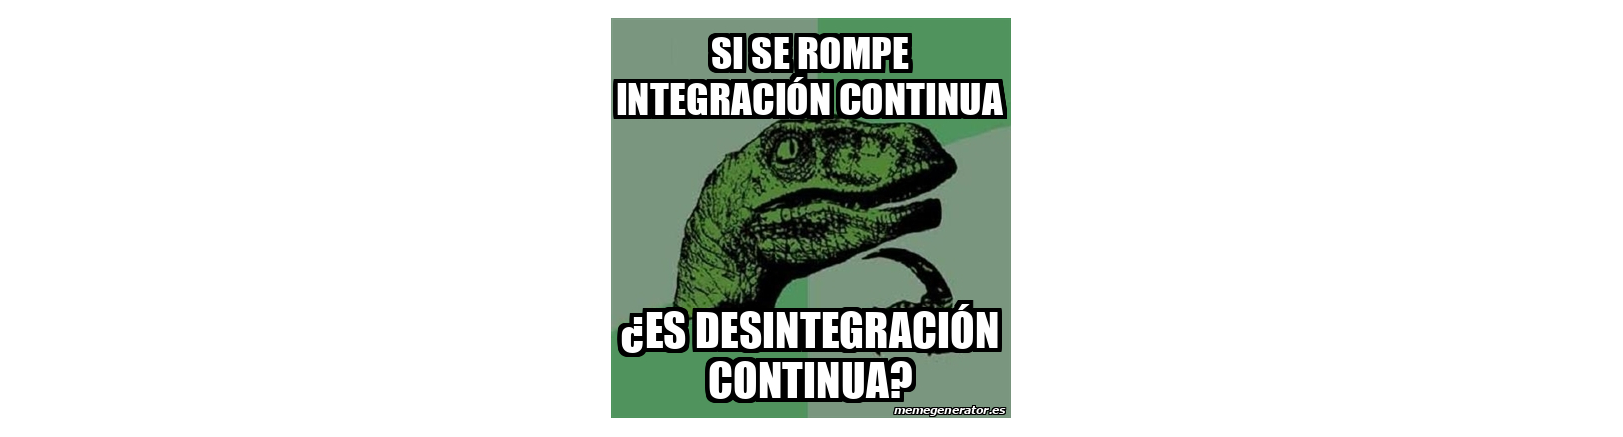

## Integración Continua
-----

Cuando se trabaja en equipo cada desarrollador tiene una copia local del repositorio. A medida que el resto de los desarrolladores publican sus cambios, esa copia local comienza a diverger. Cuando se quieran publicar los cambios locales el riesgo de conflictos aumentan con el tiempo.

Esto puede llevar a un **Merge Hell**, donde el tiempo necesario para integrar los cambios puede ser mayor al tiempo que llevó desarrollarlos.

## Integración Continua
-----

El concepto de Integración Continua surge como necesidad de chequear frecuentemente la existencia de conflictos y minimizar su impacto. **¿Cuán frecuente? Todos los dias.** Esto garantiza que los conflictos, en caso de suceder, se deban a pocos cambios y sean fáciles de corregir.

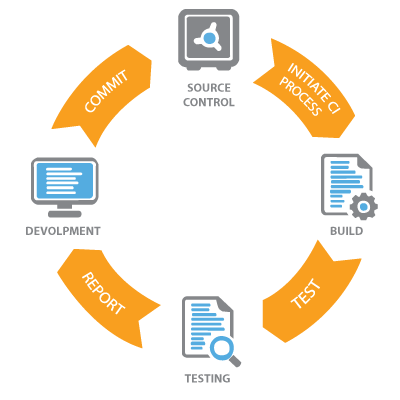

## GitHub Actions (gh-actions)
----

Github ofrece un servicio de CI que debemos configurar. Básicamente, la idea es **ejecutar tox automáticamente en cada push**.

**Paso 2 de 2**: agregar un archivo de configuración YAML en el path: `ProyectoX/.github/workflow/ci.yml`

```yaml
# Contenido de ci.yml
name: ProyectoX

on:
  - push
  - pull_request

jobs:
  build:

    runs-on: ubuntu-latest
    strategy:

      # continues even if an environment fails
      fail-fast: false

      matrix:

        # all the tox with the default python version
        py_version: [3.10]
        tox_env:
          - style
          - docstyle
          - check-manifest
          - coverage
          - make-docs

        # check version by version
        include:
          - py_version: 3.7
            tox_env: py37
          - py_version: 3.8
            tox_env: py38
          - py_version: 3.9
            tox_env: py39
          - py_version: "3.10"
            tox_env: py310
          - py_version: "3.11"
            tox_env: py311

    # the steps of the CI
    steps:
      - uses: actions/checkout@master

      # optionals
      - name: Install pandoc
        if: ${{ matrix.tox_env == 'make-docs'}}
        run: sudo apt-get install pandoc

      # tox steps
      - name: Set up Python
        uses: actions/setup-python@v2
        with:
          python-version: ${{ matrix.py_version }}
      - name: Install tox
        run: pip install tox
      - name: tox -re ${{ matrix.tox_env }}
        run: tox -re ${{ matrix.tox_env }}

```

## Cerrando

- La integración continua es necesaria para los nightly build.
- Es el punto de entrada para continuous delivery.
- Hay muchos mas servicios
  - Jekins
  - Travis
  - Azure IO
  - Cicle-CI
  - Code-ship
  
  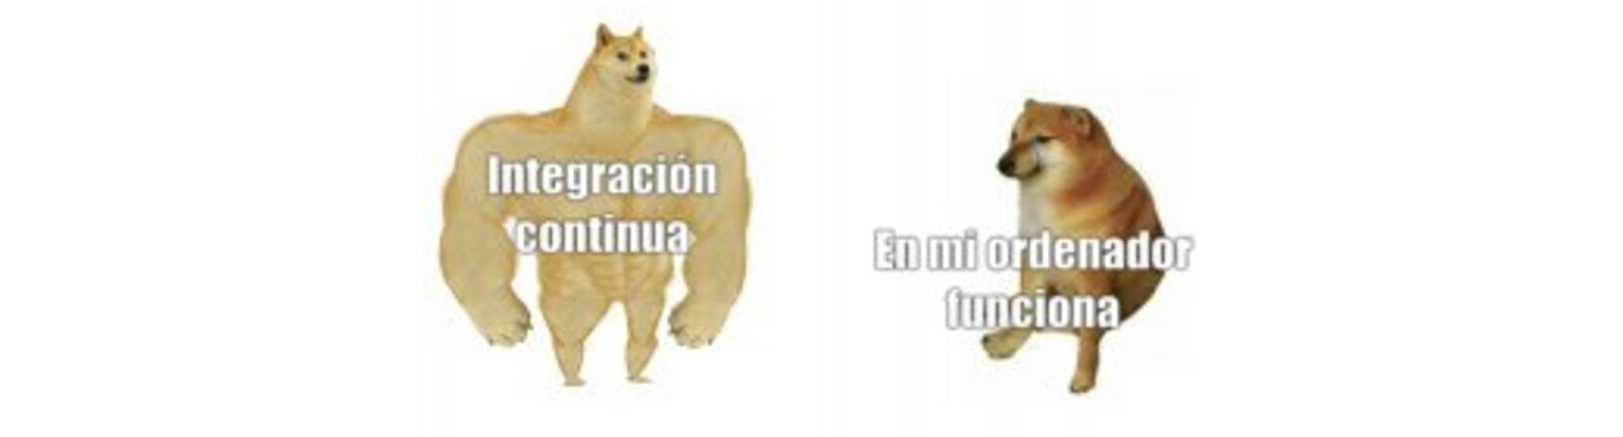